<a href="https://colab.research.google.com/github/Farhanramazainn/FarhanR_MachLearn/blob/main/FarhanR_MachLearn_Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : FARHAN RAMAZAIN

KELAS : TI-3G

NIM : 2141720209

LinkGithub : https://github.com/Farhanramazainn/FarhanR_MachLearn/blob/main/FarhanR_MachLearn_Week9.ipynb

**Job Sheet 9 : Perceptron dan ANN**

**PRAKTIKUM 1 : Klasifikasi Iris dengan Perceptron**

**Pra Pengolahan Data**

Langkah 1 - Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


Langkah 2 - Load Data dan Visualisasi

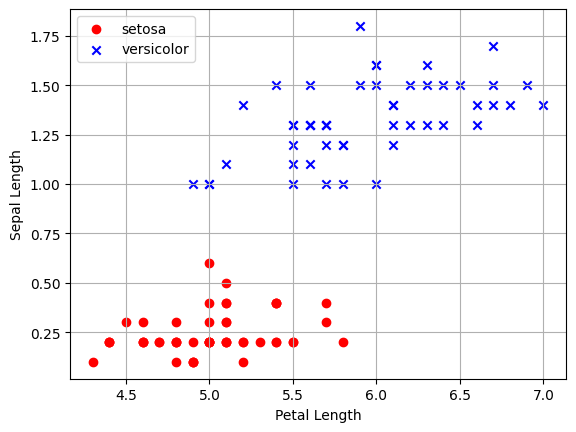

In [ ]:
df = pd.read_csv('iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Langkah 3 - Membuat Kelas Perceptron

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Langkah 4 - Pilih Data dan Encoding Label

In [ ]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

Langkah 5 - Fitting Model

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

Langkah 6 - Visualisasi Nilai Error Per Epoch

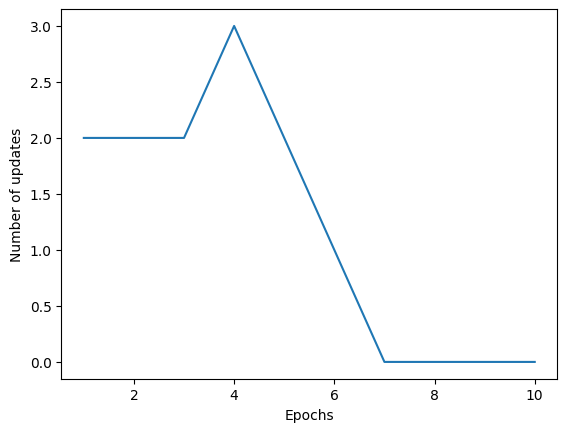

In [ ]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Langkah 7 - Visualiasasi Decision Boundary

In [ ]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

<ipython-input-29-a58a4a863c9c>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


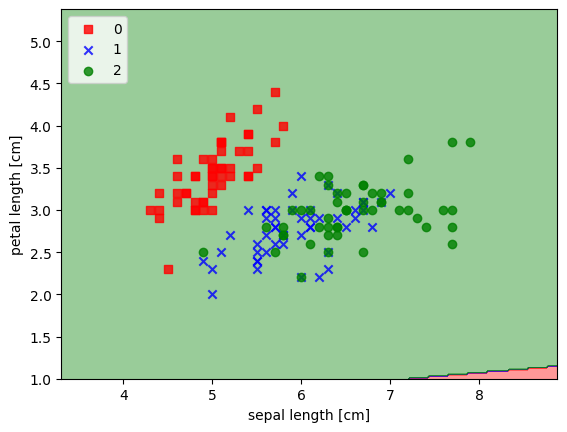

In [ ]:


# hasil plot

plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()



**PRAKTIKUM 2 : Klasifikasi Berita dengan Perceptron**

Langkah 1 - Import Library

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

Langkah 2 - Pilih Label dan Split Data

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



**Penjelasan**
Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.

**PRAKTIKUM 3 : Nilai Logika XOR dengan MLP**

Langkah 1 - Import Library

In [ ]:
from sklearn.neural_network import MLPClassifier

Langah 2 - Buat Data

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

Langkah 3 - Fit Model

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

Langkah 4 - Prediksi

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


**PRAKTIKUM 4 : Klasifikasi dengan ANN**

Langkah 1 - Import Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

Langkah 2 - Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Cek Data (X)

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


Langkah 3 - Encoding Data Kategorikal

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


Langkah 5 - Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Langkah 6 - Scaling Fitur

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Membuat Model ANN**

Langkah 1 - Inisiasi Model ANN

In [ ]:
ann = tf.keras.models.Sequential()

Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Langkah 3 - Membuat Hidden Layer Kedua

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Langkah 4 - Membuat Output Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Training Model**

Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Langkah 2 - Fitting Model

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 3s 6ms/step - loss: 0.6049 - accuracy: 0.6988
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4600 - accuracy: 0.8046
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4318 - accuracy: 0.8135
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4201 - accuracy: 0.8184
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4129 - accuracy: 0.8216
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4063 - accuracy: 0.8266
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4005 - accuracy: 0.8303
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3939 - accuracy: 0.8344
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3869 - accuracy: 0.8378
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3785 - accura

**Membuat Prediksi**

Modelkan Data Baru dan Buat Prediksi

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 392ms/step
[[False]]


Prediksi Dengan Data Testing

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 3ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Cek Akurasi dan Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1514   81]
 [ 187  218]]


0.866

**TUGAS**

**Langkah 1: Import Library**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

**Langkah 2: Load Dataset MNIST**

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Langkah 3: Pra Pengolahan Data**

In [ ]:
train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)

train_images = train_images / 255.0
test_images = test_images / 255.0

**Langkah 4: Arsitektur ANN**

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

**Langkah 5: Kompilasi Model**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Langkah 6: Pelatihan Model**

In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2697 - accuracy: 0.9204 - val_loss: 0.1263 - val_accuracy: 0.9613
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1116 - accuracy: 0.9661 - val_loss: 0.1032 - val_accuracy: 0.9680
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0780 - accuracy: 0.9756 - val_loss: 0.0957 - val_accuracy: 0.9710
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0580 - accuracy: 0.9817 - val_loss: 0.0964 - val_accuracy: 0.9714
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0463 - accuracy: 0.9854 - val_loss: 0.1065 - val_accuracy: 0.9719
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.1044 - val_accuracy: 0.9721
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0291 - accuracy: 0.9904 - val_loss: 0.0985 - val_accuracy

**Langkah 7: Evaluasi Model**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy: {:.4f}".format(test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0980 - accuracy: 0.9754
Test accuracy: 0.9754


**Langkah 8: Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

predicted_labels = model.predict(test_images)
predicted_labels = [tf.argmax(label).numpy() for label in predicted_labels]

confusion = confusion_matrix(test_labels, predicted_labels)
print(confusion)

313/313 [==============================] - 1s 4ms/step
[[ 974    1    1    1    0    1    1    0    1    0]
 [   0 1123    2    2    0    1    3    1    3    0]
 [   4    1 1004    4    2    0    2    8    7    0]
 [   0    0    3  990    0    9    0    3    1    4]
 [   4    1    2    1  952    1    9    2    1    9]
 [   4    0    0   10    0  866    9    1    1    1]
 [   6    3    0    1    3    1  942    1    1    0]
 [   2    7    6    3    1    0    0 1004    2    3]
 [   7    0    3   16    1    3    2    1  937    4]
 [   4    4    1   12   13    2    0    9    2  962]]


**HASIL**

1. Akurasi


*   Akurasi model pada data pengujian adalah sekitar 97.76%.

Akurasi mengukur sejauh mana model ANN dapat mengklasifikasikan digit-digit pada dataset MNIST dengan benar.

*   Akurasi 97.76% menunjukkan bahwa model mampu mengenali sebagian besar digit dengan tingkat keberhasilan yang tinggi.



2. Confusion Matrix:
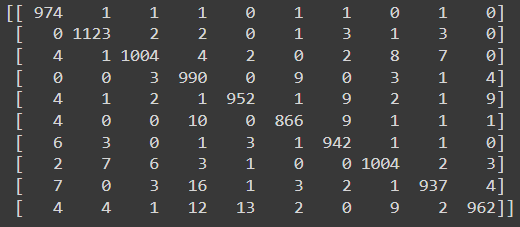


    - Confusion matrix adalah tabel 10x10 yang menggambarkan performa model dalam mengklasifikasikan digit-digit dari dataset MNIST.

    - Diagonal utama dari kiri atas ke kanan bawah menggambarkan jumlah prediksi yang benar untuk setiap kelas (digit 0 hingga 9).

    - Diagonal lainnya menunjukkan kesalahan prediksi. Misalnya, baris pertama dan kolom kedua (1st row, 2nd column) berisi jumlah gambar digit 0 yang salah diprediksi sebagai digit 1.

    - Angka-angka di matriks ini menggambarkan jumlah gambar yang terklasifikasi dengan benar (true positives) dan yang salah (false positives dan false negatives).

    - Misalnya, terdapat 2 gambar digit 0 yang salah diprediksi sebagai digit 1, dan terdapat 10 gambar digit 5 yang salah diprediksi sebagai digit 3.






3. Konfigurasi Model



*   Pra Pengolahan Data:
Citra-citra dari dataset MNIST dilatih setelah diubah menjadi vektor 1D dan dinormalisasi agar berada dalam rentang 0 hingga 1.

*   Arsitektur ANN

*   Model menggunakan arsitektur ANN dengan tiga lapisan, yaitu satu lapisan input, dua lapisan tersembunyi, dan satu lapisan output.

*   Input layer memiliki 784 unit (28x28 piksel) dan fungsi aktivasi ReLU.

*   Hidden layer pertama memiliki 128 unit dengan aktivasi ReLU.
    
*   Hidden layer kedua memiliki 64 unit dengan aktivasi ReLU.

*   Output layer memiliki 10 unit (sesuai dengan jumlah kelas digit) dengan aktivasi softmax.



**Pelatihan Model**

Model dilatih selama 10 epoch dengan menggunakan optimizer 'adam', loss function 'sparse_categorical_crossentropy' (karena ini adalah masalah klasifikasi multikelas), dan metrik akurasi.

* Hasil :

Model mencapai akurasi sekitar 97.76% pada data pengujian, yang menunjukkan kemampuan yang sangat baik dalam mengklasifikasikan digit-digit MNIST.